In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV

In [3]:
#Load the dataset
data = pd.read_csv("Downloads\_d21b2085472fd467f689f21cd421b13b_tree_addhealth.csv")

#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

In [5]:
# Data Management
data_clean = data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)
data_clean.head()

<ipython-input-5-b8b0ce882e56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)


,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,AGE,TREG1,ALCEVR1,ALCPROBS1,...,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES,MALE
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0,0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0,1
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0.0,0,...,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0,1
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0.0,0,...,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0,1
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,1.0,0,...,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0,1


In [6]:
#select predictor variables and target variable as separate data sets  
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

target = data_clean.SCHCONN1

In [7]:
# standardize predictors to have mean=0 and sd=1
predictors=predvar.copy()
from sklearn import preprocessing
predictors['MALE']=preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))

In [8]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [9]:
dict(zip(predictors.columns, model.coef_))

{'MALE': -0.21508693783564636,
 'HISPANIC': 0.20300474500010476,
 'WHITE': 0.0,
 'BLACK': -0.6936478686386683,
 'NAMERICAN': -0.10784573616425965,
 'ASIAN': 0.18869030694622152,
 'AGE': 0.21734102065275746,
 'ALCEVR1': -0.3249964960966355,
 'ALCPROBS1': 0.0,
 'MAREVER1': -0.15980377488873082,
 'COCEVER1': -0.2000092170310449,
 'INHEVER1': 0.0,
 'CIGAVAIL': -0.10983879188950578,
 'DEP1': -0.8541784447568619,
 'ESTEEM1': 1.0974098143740427,
 'VIOL1': -0.6392671702279864,
 'PASSIST': 0.0,
 'DEVIANT1': -0.41808246027792706,
 'GPA1': 0.6655764176697636,
 'EXPEL1': -0.07382899854861827,
 'FAMCONCT': 0.5152729478743258,
 'PARACTV': 0.29991192982912784,
 'PARPRES': 0.0}

In [13]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
18.14857266408148
test data MSE
17.29251742716948


In [ ]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

Text(0.5, 1.0, 'Regression Coefficients Progression for Lasso Paths')

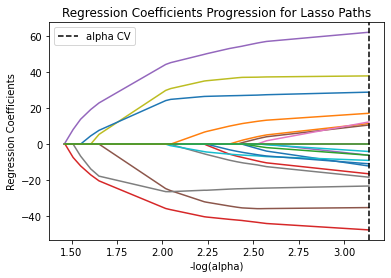

In [10]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

In [14]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.3336111369269187
test data R-square
0.3100111341600078
